In [39]:
import numpy as np
import pickle as pk
from sklearn.ensemble import VotingClassifier

In [40]:
# Features
X_train = np.load("features_train.npy")
y_train = np.load("label_features.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

In [41]:
# Models
lg_model = pk.load(open("models/Logistic_regression.pkl", "rb"))
svm_model = pk.load(open("models/Support_vector_machine.pkl", "rb"))
knn_model = pk.load(open("models/KNN.pkl", "rb"))
dt_model = pk.load(open("models/Decision_tree.pkl", "rb"))

In [42]:
# Create stimators
estimator = [("lg_model", lg_model), ("knn_model", knn_model), 
             ("dt_model", dt_model)]
ensemble = VotingClassifier(estimator, voting="hard")

In [43]:
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

In [45]:
df = pd.read_csv("images.csv")
columns = df["labels"].unique()
cnf_matrix = confusion_matrix(y_test, y_pred)

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cnf_matrix, columns, title):
    plt.figure(figsize=(12,8))
    cnf_matrix = cnf_matrix/np.sum(cnf_matrix)
    g = sns.heatmap(cnf_matrix, annot=True, cbar=False, fmt=".2%", 
                    cmap="Blues", annot_kws={"size": 12})
    g.set_yticklabels(columns, rotation=0)
    g.set_xticklabels(columns)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)
    plt.title(title, weight="bold", fontsize=16)
    plt.show()

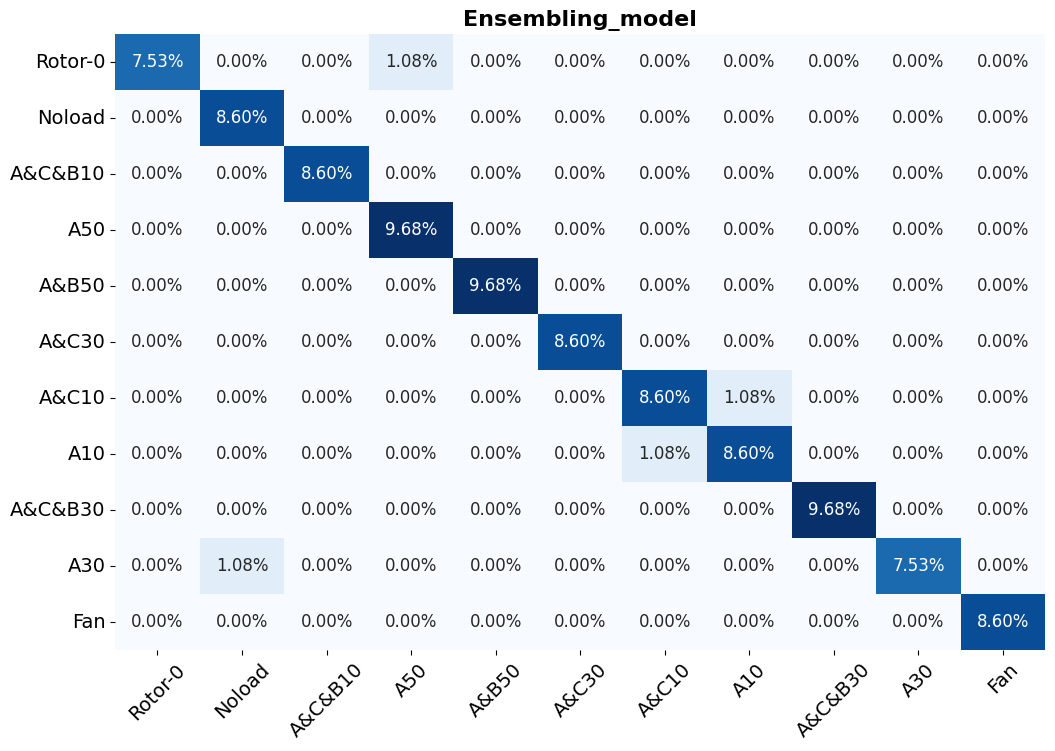

0.956989247311828


In [47]:
plot_confusion_matrix(cnf_matrix, columns, title="Ensembling_model")
print(accuracy_score(y_test, y_pred))

In [48]:
print(dt_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
